# DA-2
## Harsh Vardhan
## 19BCE1661

### Implement frequency domain filtering apart from Fourier transform

#### Here I will Be implementing Hough Transform

#### Before understanding Hough Transform lets see what Hough space is
#### So basically when we come from Image space to Hough space the major change in our lines is
#### The formula  
## y=mx+c
#### becomes
## m-c
#### But we have a problem though, with y = mx + c, we cannot represent a vertical line, as the slope is infinite. So we need a better way parametrization, polar coordinates (rho and theta).
### 1]rho: describes the distance of the line from the origin
### 2]theta: describes the angle away from horizontal

## This is the Principal Hough Transform Works on for dtecting edges and lines.


In [3]:
# We are implemting Hough transform using OpenCV's inbuilt Hough functions to implement our code.

import cv2 #using to read the image,for transform functions,implements the main ruberics
import numpy as np # for array conversions 
import math # for mathematical formula implementation
import matplotlib.pyplot as plt # for dispalying images in plots

# Firstly Lets implement Hough transform method to detect lines in the image
### We will be using HoughLinesP() function of OpenCV.
### Parameters:
#### image: 8-bit, single-channel binary source image. The image may be modified by the function.
#### lines: Output vector of lines. Each line is represented by a 4-element vector (x_1, y_1, x_2, y_2) , where (x_1,y_1) and (x_2, y_2) are the ending points of each detected line segment.
#### rho: Distance resolution of the accumulator in pixels.
#### theta: Angle resolution of the accumulator in radians.
#### threshold: Accumulator threshold parameter. Only those lines are returned that get enough votes
#### minLineLength: Minimum line length. Line segments shorter than that are rejected.
#### maxLineGap: Maximum allowed gap between points on the same line to link them.

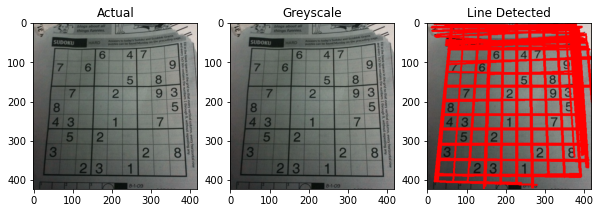

In [9]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
# Read image 
img = cv2.imread('image1.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
plt.title("Actual")
fig.add_subplot(rows, columns, 2)
# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.title("Greyscale")
fig.add_subplot(rows, columns, 3)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180,60, minLineLength=10, maxLineGap=250)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
plt.imshow(img)
plt.title("Line Detected")
plt.show()

# Now Lets implement Hough transform method to detect lines in the image
### We will be using HoughCircles() function of OpenCV.
### Parameters:
#### image: 8-bit, single-channel, grayscale input image.
#### circles: Output vector of found circles. Each vector is encoded as a 3-element floating-point vector (x, y, radius) .
#### circle_storage: In C function this is a memory storage that will contain the output sequence of found circles.
#### method: Detection method to use. Currently, the only implemented method is CV_HOUGH_GRADIENT , which is basically 21HT
#### dp: Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.
#### minDist: Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
#### param1: First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny() edge detector (the lower one is twice smaller).
#### param2: Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
#### minRadius: Minimum circle radius.
#### maxRadius: Maximum circle radius.

In [7]:
image = cv2.imread('circles.gif',cv2.IMREAD_COLOR)
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, 100)
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

plt.imshow(output)

AttributeError: 'NoneType' object has no attribute 'copy'